In [2]:
from subprocess import run, PIPE
import numpy as np
from matplotlib import pyplot as plt

In [10]:
threads = range(1, 16 + 1)
seq_times, par_times = [], []

for p in threads:
    s_times, p_times = [], []
    # print(precision, p)
    for _ in range(50):
        res = run(['./trapezoid.out', '0', '1', str(1e-6), str(p)], stdout=PIPE)
        out = str(res.stdout).split()
        st, pt = float(out[0][2:]), float(out[1][:-1])
        # print(st, pt)
        if st > 0 and pt > 0:
            s_times.append(st)
            p_times.append(pt)
    # print()
    s_times, p_times = np.array(s_times), np.array(p_times)
    seq_times.append(s_times.mean())
    par_times.append(p_times.mean())

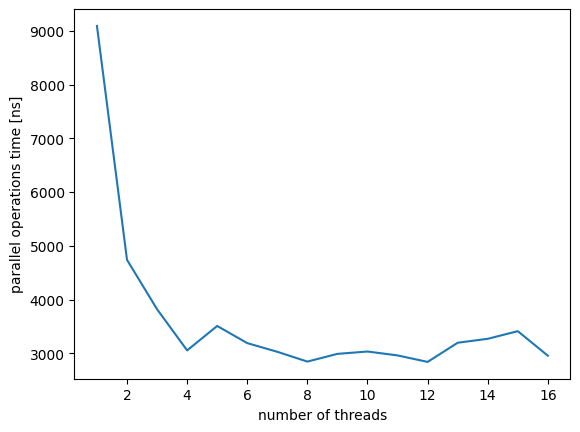

In [11]:
plt.figure(dpi=100)
plt.plot(threads, par_times)
plt.ylabel('parallel operations time [ns]')
plt.xlabel('number of threads')
plt.show()

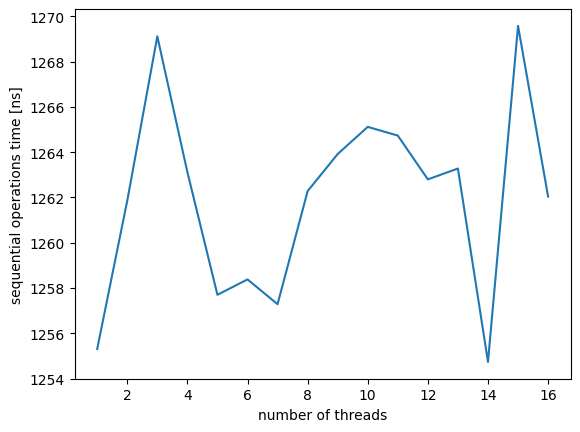

In [12]:
plt.plot(threads, seq_times)
plt.ylabel('sequential operations time [ns]')
plt.xlabel('number of threads')
plt.show()

In [19]:
def speedup(st, pt, p):
    f = st / (st + pt)
    return 1 / (f + (1 - f) / p)

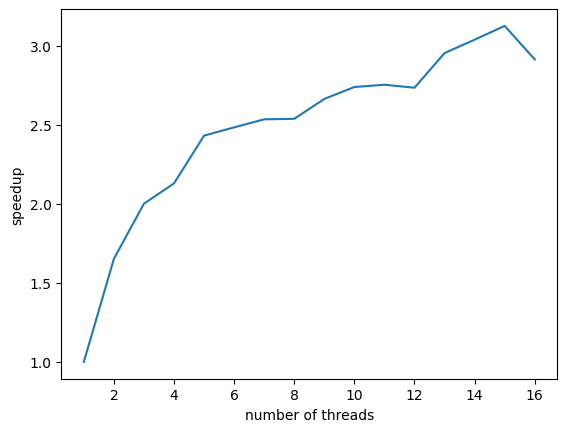

In [20]:
plt.figure(dpi=100)
plt.plot(threads,
         [speedup(seq_times[p - 1], par_times[p - 1], p)
          for p in threads])
plt.ylabel('speedup')
plt.xlabel('number of threads')
plt.show()
